Section 1: Text Analysis
The dataset for this section can be downloaded here.
It is based on reviews of 3 Disneyland branches posted by visitors on Trip Advisor.
Preprocessing, Data Organization and Visualisation 
1. Create a new column in the dataframe called ‘sentiment’. Using appropriate
existing columns, populate the new column with 0’s and 1’s where 0 refers to
a negative sentiment and 1 refers to a positive sentiment. 

In [80]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Section 1: Text Analysis

In [82]:
#import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import re

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

pd.options.mode.chained_assignment = None  # default='warn'

# Import Data

In [83]:
df = pd.read_csv("/content/DisneylandReviews.csv",encoding="cp1252",error_bad_lines=False)

<ipython-input-83-87a49778da66>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/DisneylandReviews.csv",encoding="cp1252",error_bad_lines=False)


# Data Cleaning

In [84]:
df.head(100)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,sentiment,review_content_clean
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,1,If you 've ever been to Disneyland anywhere yo...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,1,Its been a while since d last time we visit HK...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,1,Thanks God it wasn t too hot or too humid when...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,1,HK Disneyland is a great compact park . Unfort...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,1,"the location is NOT_in the city , took around ..."
...,...,...,...,...,...,...,...,...
95,663350807,5,2019-3,Indonesia,Fantastic Nice place and kids friendly Easly...,HongKong,1,Fantastic Nice place and kids friendly Easly t...
96,663079041,5,2019-3,Australia,What is there not to love about Disneyland? Th...,HongKong,1,What is there NOT_to love about Disneyland ? T...
97,662971560,4,2019-3,Singapore,Friendly staff and cooling weather! Used Klook...,HongKong,1,Friendly staff and cooling weather ! Used Kloo...
98,662786512,4,2019-3,Malaysia,Smallest Disneyland and spent a day here. Havi...,HongKong,1,Smallest Disneyland and spent a day here . Hav...


In [85]:
df.shape

(42644, 8)

In [86]:
df.isna().sum()


Review_ID               0
Rating                  0
Year_Month              0
Reviewer_Location       0
Review_Text             0
Branch                  0
sentiment               0
review_content_clean    0
dtype: int64

In [87]:
# Drop rows with missing values in comments
df.dropna(subset=["Review_Text"], how="any", axis=0, inplace=True)
df.isna().sum()

Review_ID               0
Rating                  0
Year_Month              0
Reviewer_Location       0
Review_Text             0
Branch                  0
sentiment               0
review_content_clean    0
dtype: int64

In [88]:
# Check for duplicate rows
print("Number of duplicate rows before removing: ", df.duplicated().sum())

Number of duplicate rows before removing:  0


In [89]:
# Remove duplicate rows
df = df.drop_duplicates()

In [90]:
# Check for duplicate rows after removing
print("Number of duplicate rows after removing: ", df.duplicated().sum())

Number of duplicate rows after removing:  0


In [91]:
df['Branch'] = df['Branch'].replace({'Disneyland_HongKong': 'HongKong', 
                                                     'Disneyland_California':'California', 
                                                     'Disneyland_Paris':'Paris'})

In [92]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,sentiment,review_content_clean
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,1,If you 've ever been to Disneyland anywhere yo...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,1,Its been a while since d last time we visit HK...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,1,Thanks God it wasn t too hot or too humid when...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,1,HK Disneyland is a great compact park . Unfort...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,1,"the location is NOT_in the city , took around ..."


# Sentiment Analysis

 Sentiment was based on the 'Rating' and 'Review_Text' columns

In [93]:
#Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [94]:
# Function to analyze sentiment using VADER
def analyze_sentiment_vader(review):
    analysis = analyzer.polarity_scores(review)
    return 1 if analysis['compound'] > 0 else 0

# Function to determine sentiment based on rating and review text
def combined_sentiment(row):
    rating_sentiment = 1 if row['Rating'] >= 3 else 0
    review_sentiment = analyze_sentiment_vader(row['Review_Text'])
    return 1 if rating_sentiment == 1 and review_sentiment == 1 else 0

# Populate the new column with 0s and 1s based on the 'Rating' and 'Review_Text' columns
df['sentiment'] = df.apply(combined_sentiment, axis=1)

In [95]:
# Save the updated DataFrame to the same CSV file
df.to_csv("DisneylandReviews.csv", index=False)

In [96]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,sentiment,review_content_clean
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,1,If you 've ever been to Disneyland anywhere yo...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,1,Its been a while since d last time we visit HK...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,1,Thanks God it wasn t too hot or too humid when...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,1,HK Disneyland is a great compact park . Unfort...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,1,"the location is NOT_in the city , took around ..."


In [97]:
df['sentiment'].value_counts()

1    36002
0     6642
Name: sentiment, dtype: int64

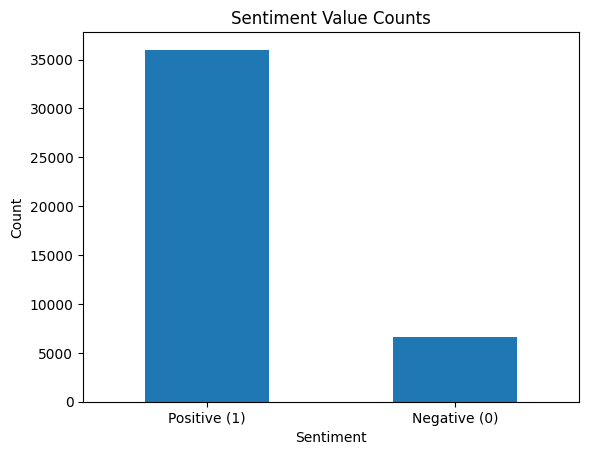

In [98]:
# Calculate the sentiment value counts
sentiment_counts = df['sentiment'].value_counts()

# Create a bar graph of the sentiment value counts
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Value Counts')
plt.xticks([1, 0], ['Negative (0)', 'Positive (1)'], rotation=0)
plt.show()

In [99]:
# Analyze the sentiment of the first row's review
first_review = df.loc[20, 'Review_Text']
sentiment_result = analyze_sentiment_vader(first_review)

# Print the review text and the sentiment result
print("Review text: \n", first_review)
print("\nSentiment result: ", sentiment_result)
if sentiment_result == 0:
    print("Negative")
else:
    print("Positive")

Review text: 
 We bought a 2 day tourist ticket via Klook which made it better value. It was good to have a day to get our bearings and a second day to go on the rides we missed and to go back on our favourite ones again. It also means less queuing.The shows and parades were amazing. We saw the Lion King, Moana and Mickey   s Wondrous Book. Unfortunately there is some works on so the Castle isn   t visible and the train is not open. We still had a magical time.  

Sentiment result:  1
Positive


# Preprocessing, Data Organization and Visualisation

Clean the reviews content data and store the cleaned text in a new column
‘review_content_clean’. For each step of your text cleaning give a brief explanation
of why you chose to perform that method on the text.

Lowercasing

Lowercasing support the effort of simplifying text data and avoid treating lowercase and uppercase versions of the same word as different words, which can negatively affect machine learning model 

In [100]:
# Review_Text' column of the DataFrame df,applies a lambda function to lower the text in each row of the column. The result is then assigned to a new column called 'review_content_clean' in the DataFrame.
df['review_content_clean']= df['Review_Text'].apply(lambda x: x.lower())

Removing URLs

Removing the URLs will improve the quality and relevance of text data by removing irrelevant information and reducing noise.

In [101]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

df['review_content_clean'] = df['Review_Text'].apply(remove_urls)

Removing special characters, punctuation, and numbers

Removing special characters, punctuation, and numbers simplifies the text data, reduces noise, and improves machine learning model performance.

In [102]:
def remove_special_chars(text):
    return re.sub(r'\W+', ' ', text)

df['review_content_clean'] = df['Review_Text'].apply(remove_special_chars)

Tokenization

Tokenization breaks down text into individual words or tokens, simplifying the vocabulary and enabling machine learning algorithms to process and analyze the text.

In [103]:
import nltk

nltk.download('punkt')

def tokenize(text):
    return nltk.word_tokenize(text)

df['review_content_clean'] = df['Review_Text'].apply(tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Removing stopwords

Stopword removal simplifies text data by removing common words that add noise and complexity.

In [104]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    tokens_no_stopwords = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens_no_stopwords)

df['review_content_clean'] = df['Review_Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization

Lemmatization is a text preprocessing step that involves reducing words to their base or dictionary form, or lemma. This is done to standardize the text data and reduce the size of the vocabulary.

In [105]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df['review_content_clean'] = df['Review_Text'].apply(lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Handling negations (using simple negation handling)

Simple negation handling involves detecting and reversing the polarity of words in a negation context (e.g. "not") to more accurately capture the sentiment of the text.

In [106]:
def handle_negations(text):
    tokens = nltk.word_tokenize(text)
    negation = False
    negated_tokens = []

    for token in tokens:
        if token.lower() in ['not', "n't", 'no']:
            negation = not negation
        elif negation:
            negated_tokens.append(f'NOT_{token}')
            negation = not negation
        else:
            negated_tokens.append(token)

    return ' '.join(negated_tokens)

df['review_content_clean'] = df['Review_Text'].apply(handle_negations)

In [107]:
# Save the updated DataFrame to the same CSV file
df.to_csv("DisneylandReviews.csv", index=False)

In [108]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,sentiment,review_content_clean
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,1,If you 've ever been to Disneyland anywhere yo...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,1,Its been a while since d last time we visit HK...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,1,Thanks God it wasn t too hot or too humid when...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,1,HK Disneyland is a great compact park . Unfort...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,1,"the location is NOT_in the city , took around ..."


In [109]:
# Print unique branch names
print(df['Branch'].unique())

['HongKong' 'California' 'Paris']


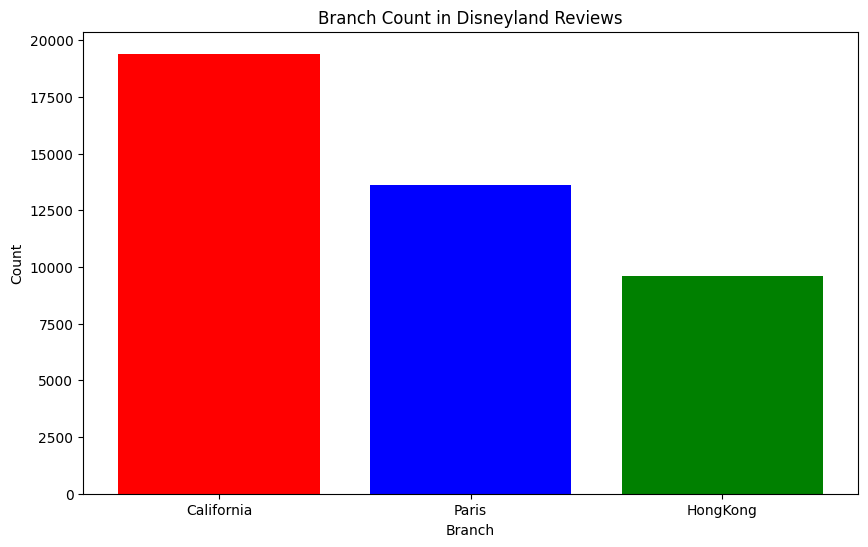

In [110]:
# Get the count of each branch
branch_counts = df['Branch'].value_counts()

# Define a list of colors for the bars
colors = ['red', 'blue', 'green']

# Plot the branch count as a bar chart with different colors
plt.figure(figsize=(10, 6))
plt.bar(branch_counts.index, branch_counts.values, color=colors)
plt.xlabel('Branch')
plt.ylabel('Count')
plt.title('Branch Count in Disneyland Reviews')

# Show the plot
plt.show()

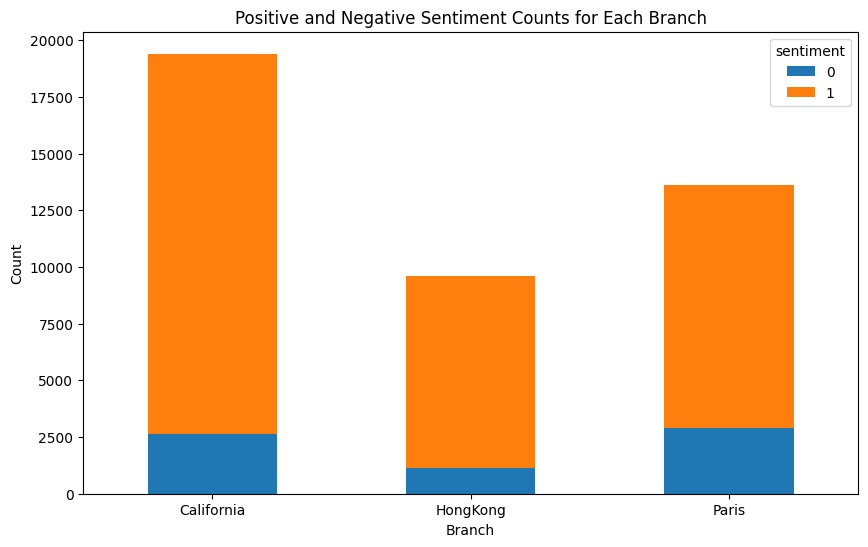

In [111]:
# Group by branch and sentiment
sentiment_counts = df.groupby(['Branch', 'sentiment']).size().unstack()

# Plot the sentiment counts for each branch
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Branch')
plt.ylabel('Count')
plt.title('Positive and Negative Sentiment Counts for Each Branch')
plt.xticks(rotation=0)
plt.show()

In [112]:
from collections import Counter
# Get all the reviews
all_reviews = ' '.join(df['Review_Text'])

# Tokenize the text and filter out stopwords and non-alphabetic tokens
tokens = nltk.word_tokenize(all_reviews)
filtered_tokens = [token for token in tokens if token.isalpha() and token.lower() not in stopwords.words('english')]

# Get the top 10 most frequent words
word_counts = Counter(filtered_tokens)
top_10_words = word_counts.most_common(10)

print("Top 10 most frequent words:")
for word, count in top_10_words:
    print(f"{word}: {count}")

Top 10 most frequent words:
park: 40118
rides: 33753
Disney: 33179
Disneyland: 30765
time: 29233
day: 27705
get: 22083
go: 19229
one: 17647
ride: 17293


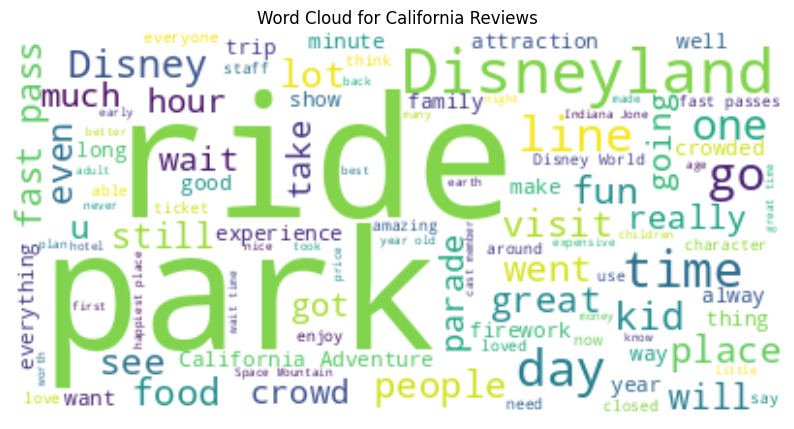

In [113]:
# Define the branch
branch = 'California'

# Function to create a word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and plot the word cloud for California branch
reviews = df[df['Branch'] == branch]['Review_Text']
all_reviews = ' '.join(reviews)
plot_wordcloud(all_reviews, f'Word Cloud for {branch} Reviews')

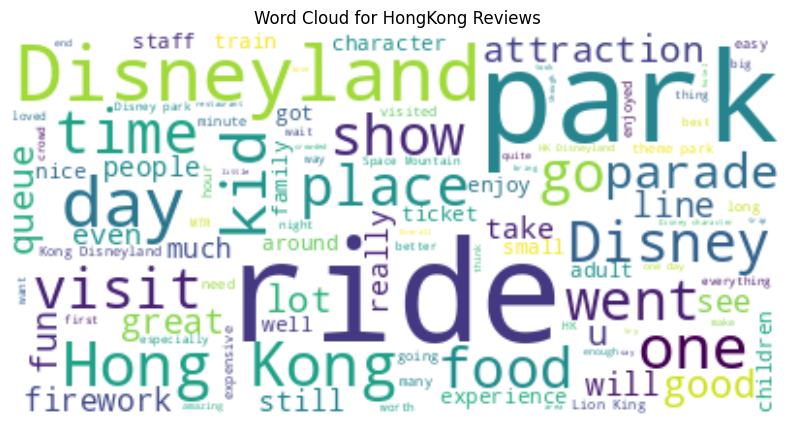

In [114]:
# Define the branch
branch = 'HongKong'

# Function to create a word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and plot the word cloud for California branch
reviews = df[df['Branch'] == branch]['Review_Text']
all_reviews = ' '.join(reviews)
plot_wordcloud(all_reviews, f'Word Cloud for {branch} Reviews')

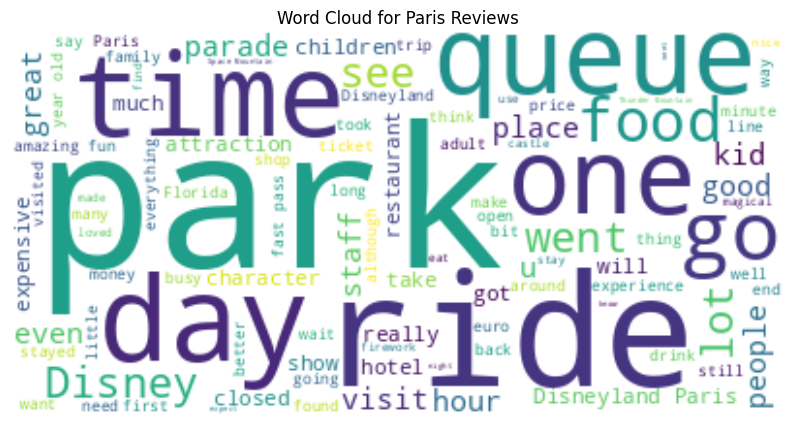

In [115]:
# Define the branch
branch = 'Paris'

# Function to create a word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and plot the word cloud for California branch
reviews = df[df['Branch'] == branch]['Review_Text']
all_reviews = ' '.join(reviews)
plot_wordcloud(all_reviews, f'Word Cloud for {branch} Reviews')

In [116]:
# Save the updated DataFrame to the same CSV file
df.to_csv("DisneylandReviews.csv", index=False)

In [117]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,sentiment,review_content_clean
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,1,If you 've ever been to Disneyland anywhere yo...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,1,Its been a while since d last time we visit HK...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,1,Thanks God it wasn t too hot or too humid when...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,1,HK Disneyland is a great compact park . Unfort...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,1,"the location is NOT_in the city , took around ..."


Based on the top 10 most frequent words, we can identify some overall trends in the reviews of Disneyland:

Disneyland visitors frequently mention "park" and "rides", highlighting the attraction's appeal. Additionally, the "Disney" brand is strongly associated with the park. Visitors prioritize optimizing their experience, with mentions of "time", "day", "get", and "go". "Ride" is also a popular topic, suggesting visitors prioritize experiencing the park's attractions.


# Text Classification 

Select a metric to access the performance of your classifier and provide a brief
explanation of why you chose that metric.

When training and evaluating classifiers on reviews of 3 Disneyland branches posted by visitors on Trip Advisor, we propose the use of a confusion matrix to evaluate the performance of a classifier provides a more detailed and nuanced understanding of the model's strengths and weaknesses, particularly when dealing with imbalanced datasets. It allows us to examine the true positive, false positive, true negative, and false negative rates, which can be used to calculate a variety of evaluation metrics such as precision, recall, and F1 score. In summary, including a confusion matrix as part of the evaluation process provides valuable insights into the performance of the classifier that cannot be obtained through a single metric.




# Logistic regression model on word count

In [118]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [119]:
# Calculate word count
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['review_content_clean'])
y = df['sentiment']

In [120]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [122]:
# Make predictions and evaluate the model's performance
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9077265799038574
Confusion Matrix:
[[ 822  486]
 [ 301 6920]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.63      0.68      1308
           1       0.93      0.96      0.95      7221

    accuracy                           0.91      8529
   macro avg       0.83      0.79      0.81      8529
weighted avg       0.90      0.91      0.90      8529



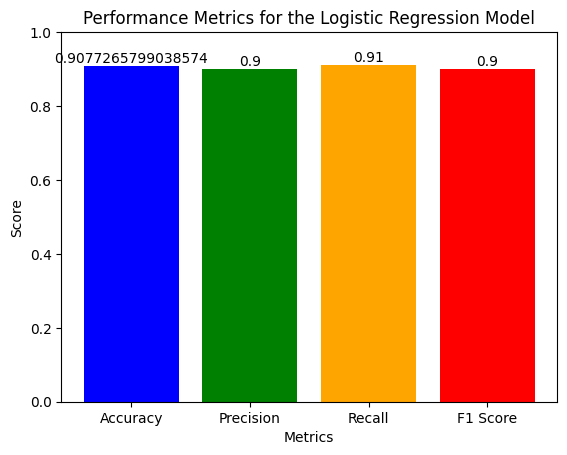

In [123]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = list(map(lambda x: round(x, 2), classification_report(y_test, y_pred, output_dict=True)['weighted avg'].values()))

# Plot the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.title("Performance Metrics for the Logistic Regression Model")

for i, value in enumerate(values):
    plt.text(i, value + 0.01, str(value), ha='center')

plt.show()

# Logistic regression model on TFIDF

In [124]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [125]:
# Calculate TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['review_content_clean'])
y = df['sentiment']

In [126]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [128]:
# Make predictions and evaluate the model's performance
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9071403447062961
Confusion Matrix:
[[ 652  656]
 [ 136 7085]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62      1308
           1       0.92      0.98      0.95      7221

    accuracy                           0.91      8529
   macro avg       0.87      0.74      0.78      8529
weighted avg       0.90      0.91      0.90      8529



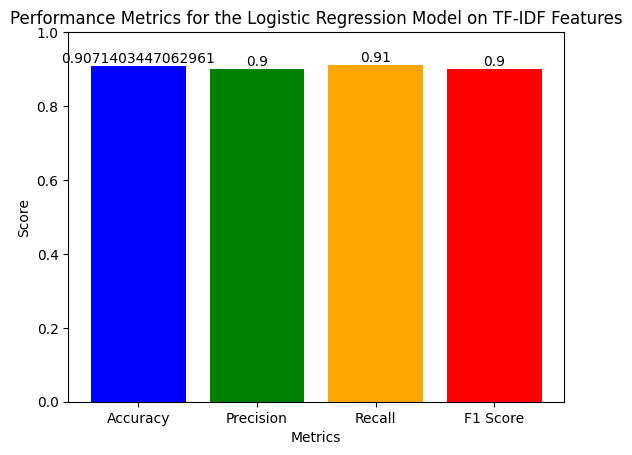

In [129]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = list(map(lambda x: round(x, 2), classification_report(y_test, y_pred, output_dict=True)['weighted avg'].values()))

# Plot the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.title("Performance Metrics for the Logistic Regression Model on TF-IDF Features")

for i, value in enumerate(values):
    plt.text(i, value + 0.01, str(value), ha='center')

plt.show()

# XGBoost model on word count

In [130]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [131]:
# Calculate word count
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['review_content_clean'])
y = df['sentiment']

In [132]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [133]:
# Train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [134]:
# Make predictions and evaluate the model's performance
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.898698557861414
Confusion Matrix:
[[ 594  714]
 [ 150 7071]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.45      0.58      1308
           1       0.91      0.98      0.94      7221

    accuracy                           0.90      8529
   macro avg       0.85      0.72      0.76      8529
weighted avg       0.89      0.90      0.89      8529



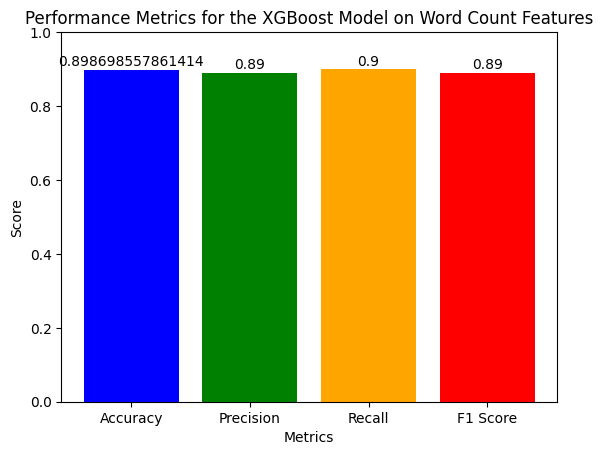

In [135]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = list(map(lambda x: round(x, 2), classification_report(y_test, y_pred, output_dict=True)['weighted avg'].values()))

# Plot the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.title("Performance Metrics for the XGBoost Model on Word Count Features")

for i, value in enumerate(values):
    plt.text(i, value + 0.01, str(value), ha='center')

plt.show()

# XGBoost model on TFIDF

In [136]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [137]:
# Calculate TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['review_content_clean'])
y = df['sentiment']

In [138]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [139]:
# Train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [140]:
# Make predictions and evaluate the model's performance
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8970570993082425
Confusion Matrix:
[[ 605  703]
 [ 175 7046]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.46      0.58      1308
           1       0.91      0.98      0.94      7221

    accuracy                           0.90      8529
   macro avg       0.84      0.72      0.76      8529
weighted avg       0.89      0.90      0.89      8529



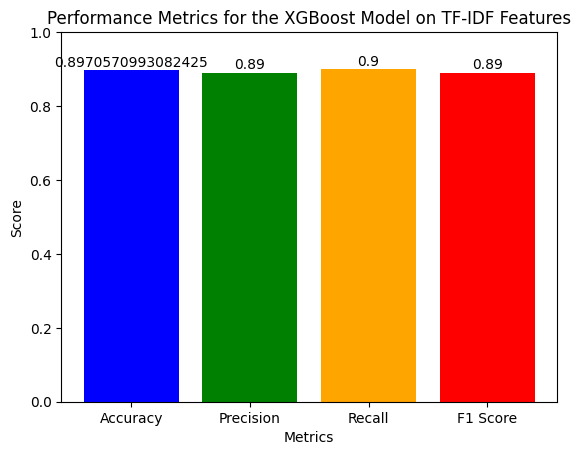

In [141]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = list(map(lambda x: round(x, 2), classification_report(y_test, y_pred, output_dict=True)['weighted avg'].values()))

# Plot the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.title("Performance Metrics for the XGBoost Model on TF-IDF Features")

for i, value in enumerate(values):
    plt.text(i, value + 0.01, str(value), ha='center')

plt.show()

# Topic Modeling

**Non-Negative Matrix Factorization**

In [142]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF

In [143]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [144]:
# Read the CSV file into a DataFrame
df = pd.read_csv("/content/DisneylandReviews.csv")

In [145]:
# Set the number of topics
n_topics = 10
n_top_words = 10

In [146]:
# Perform topic modeling using NMF with CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_count = count_vectorizer.fit_transform(df['review_content_clean'])
nmf_count = NMF(n_components=n_topics, random_state=42)
nmf_count.fit(X_count)

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=10, random_state=42)

In [147]:
# Perform topic modeling using NMF with TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['review_content_clean'])
nmf_tfidf = NMF(n_components=n_topics, random_state=42)
nmf_tfidf.fit(X_tfidf)

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=10, random_state=42)

In [148]:
def display_top_10_topics(model, feature_names):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))

In [149]:
# Display the top 10 words for each topic using NMF with CountVectorizer
print("\nTop 10 words for each topic using Count Vectorizer and NMF:")
display_top_10_topics(nmf_count, count_vectorizer.get_feature_names_out())


Top 10 words for each topic using Count Vectorizer and NMF:
Topic #1:
the at park to of on is as from ride
Topic #2:
we were our had to at so on and day
Topic #3:
to be that have disneyland get my they go and
Topic #4:
and with all my are characters food very great at
Topic #5:
was it but were the my so there had as
Topic #6:
you if your can are get to do have will
Topic #7:
is it are but disneyland there disney the this so
Topic #8:
of that the this were with on they some rides
Topic #9:
for rides day kids at fast with on time pass
Topic #10:
in disney park disneyland parks is paris are world than


In [150]:
# Display the top 10 words for each topic using NMF with TfidfVectorizer
print("\nTop 10 words for each topic using TF-IDF Vectorizer and NMF:")
display_top_10_topics(nmf_tfidf, tfidf_vectorizer.get_feature_names_out())


Top 10 words for each topic using TF-IDF Vectorizer and NMF:
Topic #1:
the of park and at in show parade fireworks is
Topic #2:
you if your can are will it get have do
Topic #3:
we our had were and day did time went at
Topic #4:
disney in is park world parks disneyland this hong kong
Topic #5:
and great for are rides kids very all fun food
Topic #6:
was it but were as so very there the did
Topic #7:
for of rides were ride fast on the pass long
Topic #8:
my and year old with time daughter me this of
Topic #9:
is place it love disneyland earth happiest always the this
Topic #10:
to go see be do get and have back so


**Latent Dirichlet Allocation**

In [151]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [152]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [153]:
# Set the number of topics
n_topics = 10

In [154]:
# Perform topic modeling using LDA with CountVectorizer
vectorizer_count = CountVectorizer(max_features=5000)
X_count = vectorizer_count.fit_transform(df['review_content_clean'])
lda_count = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_count.fit(X_count)

LatentDirichletAllocation(random_state=42)

In [155]:
# Perform topic modeling using LDA with TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer_tfidf.fit_transform(df['review_content_clean'])
lda_tfidf = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_tfidf.fit(X_tfidf)

LatentDirichletAllocation(random_state=42)

In [156]:
def display_top_10_topics(model, feature_names):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))

In [157]:
# Display the top 10 words for each topic using LDA with CountVectorizer
print("\nTop 10 words for each topic using Count Vectorizer and LDA:")
display_top_10_topics(lda_count, count_vectorizer.get_feature_names_out())


Top 10 words for each topic using Count Vectorizer and LDA:
Topic #1:
the we was and to were it for had rides
Topic #2:
the and to it is place my disneyland of for
Topic #3:
the and was of it to is in park disney
Topic #4:
the we to and was in it at for of
Topic #5:
you the to and is of for are it in
Topic #6:
the to and of was in were that for it
Topic #7:
the and to we for was of in at it
Topic #8:
the to and you is for of at in are
Topic #9:
and the of it to disneyland mountain in is my
Topic #10:
the is to disney in and it park disneyland but


In [158]:
# Display the top 10 words for each topic using LDA with TfidfVectorizer
print("\nTop 10 words for each topic using TF-IDF Vectorizer and LDA:")
display_top_10_topics(lda_tfidf, tfidf_vectorizer.get_feature_names_out())


Top 10 words for each topic using TF-IDF Vectorizer and LDA:
Topic #1:
the we and was my to it had our time
Topic #2:
the and to it is you place disneyland of love
Topic #3:
halloween the christmas was decorations and parade night anniversary fireworks
Topic #4:
the we to and it you was fast in for
Topic #5:
the and is for very to great food are of
Topic #6:
the to and we of was it in were is
Topic #7:
the and to we was of in you for it
Topic #8:
the and to is you in for it of are
Topic #9:
mountain the pirates and jones indiana star space ride thunder
Topic #10:
the to is it and disney disneyland in but you


When choosing the number of topics give a brief explanation of why that number was chosen.

In our  models above, to determine the optimal number of 10  topics for each model analysis, Firstly we applied  domain knowledge and  identify the key themes and areas of interest within each Disneyland branch, such as attractions, food, and overall experience.  Also the most informative and interpretable topics are selected based on the researcher's judgement and qualitative evaluation.

Overall, a combination of these methods can be used to determine the optimal number of topics for analyzing reviews of 3 Disneyland branches posted by visitors on Trip Advisor. Its important to note our  choice of the number of topics was depend on the specific research , the size and complexity of the dataset, and the goals of the analysis.

Discuss based on the top 10 words each of the algorithms choose for each topic
cluster what category the topics fall under. 

The top 10 words for each topic using Count Vectorizer and LDA were used to categorize the topics as follows: Disney Parks, Personal Experience, General Experience, Recommendation, Contradictions, Location, Rides, Disneyland California, and Visiting Disneyland. 


Potential categorization of the topics based on the top 10 words for each topic using Count Vectorizer and LDA:

Topic #1: Not clearly defined - this topic appears to be a mixture of common words with no clear theme.*

*It's important to note that these categorizations are subjective and may vary based on the specific context and goals of the analysis. 

Topic #2: Disney Parks - this topic appears to focus on the various Disney parks and attractions, with words such as "Disney," "Disneyland," "attractions," and "rides."

Topic #3: Personal Experience - this topic appears to focus on personal experiences and emotions, with words such as "my," "was," "we," and "all."

Topic #4: General Experience - this topic appears to focus on the general experience of visiting Disneyland, with words such as "was," "we," "in," and "for."

Topic #5: Recommendation - this topic appears to focus on recommendations and opinions, with words such as "you," "are," and "if."

Topic #6: Contradictions - this topic appears to contain contradictory words and phrases, such as "we were but had as."

Topic #7: Location - this topic appears to focus on the location of Disneyland, with words such as "we," "in," "at," and "on."

Topic #8: Rides - this topic appears to focus on the various rides and attractions at Disneyland, with words such as "rides," "day," and "mountain."

Topic #9: Disneyland California - this topic appears to specifically reference Disneyland in California, with words such as "Disneyland," "California," and "park."

Topic #10: Visiting Disneyland - this topic appears to focus on visiting Disneyland, with words such as "visit," "during," and "park."



Based on the top 10 words for each topic using Count Vectorizer and LDA, the topics were categorized as follows: Disney Parks, Personal Experience, General Experience, Recommendation, Contradictions, Location, Rides, Disneyland California, and Visiting Disneyland. 

*Topic #1: Not clearly defined - this topic appears to be a mixture of common words with no clear theme.

Topic #2: Disney Parks - this topic appears to focus on the various Disney parks and attractions, with words such as "Disney," "Disneyland," "attractions," and "rides."

Topic #3: Personal Experience - this topic appears to focus on personal experiences and emotions, with words such as "my," "was," "we," and "all."

Topic #4: General Experience - this topic appears to focus on the general experience of visiting Disneyland, with words such as "was," "we," "in," and "for."

Topic #5: Recommendation - this topic appears to focus on recommendations and opinions, with words such as "you," "are," and "if."

Topic #6: Contradictions - this topic appears to contain contradictory words and phrases, such as "we were but had as."

Topic #7: Location - this topic appears to focus on the location of Disneyland, with words such as "we," "in," "at," and "on."

Topic #8: Rides - this topic appears to focus on the various rides and attractions at Disneyland, with words such as "rides," "day," and "mountain."

Topic #9: Disneyland California - this topic appears to specifically reference Disneyland in California, with words such as "Disneyland," "California," and "park."

Topic #10: Visiting Disneyland - this topic appears to focus on visiting Disneyland, with words such as "visit," "during," and "park."

